# Challenge 1

El objetivo es  construir un modelo que prediga si un ítem que se publica en el marketplace tiene condición de "nuevo" o "usado" eligiendo una métrica adecuada para evaluarlo y fundamentando dicha elección. 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sb
import jsonlines
from pandas.io.json import json_normalize

C:\Users\Laura\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data set cleaning <a class="anchor" id="first-bullet"></a>

In [2]:
initial_data = pd.read_json("MLA_100k.jsonlines",lines=True)

In [3]:
type(initial_data)


pandas.core.frame.DataFrame

In [4]:
initial_data.head()


,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [5]:
file = open("MLA_100k.jsonlines", 'r', encoding='utf-8')
data = []
for line in file.readlines():
    dic = json.loads(line)
    data.append(dic)
  
print(len(data))

100000


In [6]:
df = pd.io.json.json_normalize(data)

C:\Users\Laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [7]:
df.head()

,warranty,sub_status,condition,seller_contact,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,...,location.longitude,location.country.name,location.country.id,location.address_line,location.latitude,location.zip_code,location.city.name,location.city.id,location.state.name,location.state.id
0,None,[],new,NaN,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NUESTRA REPUTACION,[],used,NaN,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,[],used,NaN,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,[],new,NaN,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MI REPUTACION.,[],used,NaN,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['warranty', 'sub_status', 'condition', 'seller_contact', 'deal_ids',
       'base_price', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity',
       'seller_address.comment', 'seller_address.longitude',
       'seller_address.id', 'seller_address.country.name',
       'seller_address.country.id', 'seller_address.address_line',
       'seller_address.latitud

In [9]:
df.shape

(100000, 92)

In [10]:
df['condition']=df['condition'].map({"new":1,"used":0})
df['condition'].dtype

dtype('int64')

### Tipo de datos <a class="anchor" id="first-bullet"></a>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 92 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   warranty                                          39104 non-null   object 
 1   sub_status                                        100000 non-null  object 
 2   condition                                         100000 non-null  int64  
 3   seller_contact                                    0 non-null       float64
 4   deal_ids                                          100000 non-null  object 
 5   base_price                                        100000 non-null  float64
 6   non_mercado_pago_payment_methods                  100000 non-null  object 
 7   seller_id                                         100000 non-null  int64  
 8   variations                                        100000 non-null  object 
 9   site_

In [12]:
df["shipping.local_pick_up"] = df["shipping.local_pick_up"].astype(int)
df['shipping.local_pick_up'].dtype

dtype('int32')

In [13]:
df["shipping.free_shipping"] = df["shipping.free_shipping"].astype(int)
df['shipping.free_shipping'].dtype

dtype('int32')

In [14]:
df["accepts_mercadopago"] = df["accepts_mercadopago"].astype(int)
df['accepts_mercadopago'].dtype

dtype('int32')

In [15]:
df["automatic_relist"] = df["automatic_relist"].astype(int)
df['automatic_relist'].dtype

dtype('int32')

In [16]:
num = (df.dtypes == 'float64') | (df.dtypes == 'int32')  | (df.dtypes == 'int64')
num

warranty               False
sub_status             False
condition               True
seller_contact          True
deal_ids               False
                       ...  
location.zip_code      False
location.city.name     False
location.city.id       False
location.state.name    False
location.state.id      False
Length: 92, dtype: bool

In [17]:
num.index

Index(['warranty', 'sub_status', 'condition', 'seller_contact', 'deal_ids',
       'base_price', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity',
       'seller_address.comment', 'seller_address.longitude',
       'seller_address.id', 'seller_address.country.name',
       'seller_address.country.id', 'seller_address.address_line',
       'seller_address.latitud

In [18]:
for el in num.index:
    print(el)

warranty
sub_status
condition
seller_contact
deal_ids
base_price
non_mercado_pago_payment_methods
seller_id
variations
site_id
listing_type_id
price
attributes
buying_mode
tags
listing_source
parent_item_id
coverage_areas
category_id
descriptions
last_updated
international_delivery_mode
pictures
id
official_store_id
differential_pricing
accepts_mercadopago
original_price
currency_id
thumbnail
title
automatic_relist
date_created
secure_thumbnail
stop_time
status
video_id
catalog_product_id
subtitle
initial_quantity
start_time
permalink
sold_quantity
available_quantity
seller_address.comment
seller_address.longitude
seller_address.id
seller_address.country.name
seller_address.country.id
seller_address.address_line
seller_address.latitude
seller_address.search_location.neighborhood.name
seller_address.search_location.neighborhood.id
seller_address.search_location.state.name
seller_address.search_location.state.id
seller_address.search_location.city.name
seller_address.search_location.city

In [19]:
num_cols = [c for c in num.index if num[c]]

In [20]:
num_cols

['condition',
 'seller_contact',
 'base_price',
 'seller_id',
 'price',
 'official_store_id',
 'accepts_mercadopago',
 'original_price',
 'automatic_relist',
 'catalog_product_id',
 'initial_quantity',
 'sold_quantity',
 'available_quantity',
 'shipping.local_pick_up',
 'shipping.free_shipping']

In [21]:
obj = (df.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]
obj_cols

['warranty',
 'sub_status',
 'deal_ids',
 'non_mercado_pago_payment_methods',
 'variations',
 'site_id',
 'listing_type_id',
 'attributes',
 'buying_mode',
 'tags',
 'listing_source',
 'parent_item_id',
 'coverage_areas',
 'category_id',
 'descriptions',
 'last_updated',
 'international_delivery_mode',
 'pictures',
 'id',
 'differential_pricing',
 'currency_id',
 'thumbnail',
 'title',
 'date_created',
 'secure_thumbnail',
 'stop_time',
 'status',
 'video_id',
 'subtitle',
 'start_time',
 'permalink',
 'seller_address.comment',
 'seller_address.longitude',
 'seller_address.id',
 'seller_address.country.name',
 'seller_address.country.id',
 'seller_address.address_line',
 'seller_address.latitude',
 'seller_address.search_location.neighborhood.name',
 'seller_address.search_location.neighborhood.id',
 'seller_address.search_location.state.name',
 'seller_address.search_location.state.id',
 'seller_address.search_location.city.name',
 'seller_address.search_location.city.id',
 'seller_ad

In [22]:
df_num = df[num_cols]
# Estadísticas de las columnas númericas
df_num.describe()

,condition,seller_contact,base_price,seller_id,price,official_store_id,accepts_mercadopago,original_price,automatic_relist,catalog_product_id,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping
count,100000.000000,0.0,1.000000e+05,1.000000e+05,1.000000e+05,818.000000,100000.000000,143.000000,100000.000000,1.100000e+01,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.537580,NaN,5.252423e+04,8.425269e+07,5.252433e+04,206.443765,0.977810,1593.341958,0.046970,3.727643e+06,35.093370,2.396990,34.842380,0.795610,0.030160
std,0.498588,NaN,8.623127e+06,5.497257e+07,8.623127e+06,128.252953,0.147302,2245.798072,0.211576,1.884698e+06,421.076196,42.685077,420.808403,0.403257,0.171028
min,0.000000,NaN,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,0.000000,120.000000,0.000000,9.440400e+04,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,NaN,9.000000e+01,3.953591e+07,9.000000e+01,84.000000,1.000000,449.000000,0.000000,3.050702e+06,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,NaN,2.500000e+02,7.631063e+07,2.500000e+02,216.000000,1.000000,858.000000,0.000000,5.093232e+06,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,NaN,8.000000e+02,1.325659e+08,8.000000e+02,312.750000,1.000000,1500.000000,0.000000,5.103216e+06,2.000000,0.000000,2.000000,1.000000,0.000000
max,1.000000,NaN,2.222222e+09,1.946906e+08,2.222222e+09,446.000000,1.000000,13999.000000,1.000000,5.434513e+06,9999.000000,8676.000000,9999.000000,1.000000,1.000000


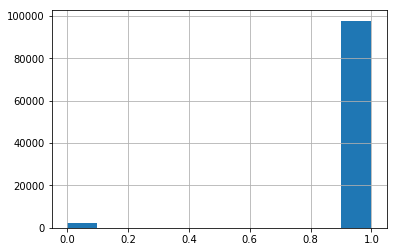

In [23]:
df['accepts_mercadopago'].hist()


### Limpieza de datos <a class="anchor" id="first-bullet"></a>

In [24]:
df_num.notnull().apply(pd.Series.value_counts)

,condition,seller_contact,base_price,seller_id,price,official_store_id,accepts_mercadopago,original_price,automatic_relist,catalog_product_id,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping
False,NaN,100000.0,NaN,NaN,NaN,99182,NaN,99857,NaN,99989,NaN,NaN,NaN,NaN,NaN
True,100000.0,NaN,100000.0,100000.0,100000.0,818,100000.0,143,100000.0,11,100000.0,100000.0,100000.0,100000.0,100000.0


In [25]:
available = df_num.notnull()
available.all(axis=1).value_counts()

False    100000
dtype: int64

In [26]:
df_num = df_num.drop('official_store_id',axis=1)
df_num = df_num.drop('original_price',axis=1)
df_num = df_num.drop('catalog_product_id',axis=1)
df_num = df_num.drop('seller_contact',axis=1)


In [27]:
df_num.head()

,condition,base_price,seller_id,price,accepts_mercadopago,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping
0,1,80.0,74952096,80.0,1,0,1,0,1,1,0
1,0,2650.0,42093335,2650.0,1,0,1,0,1,1,0
2,0,60.0,133384258,60.0,1,0,1,0,1,1,0
3,1,580.0,143001605,580.0,1,0,1,0,1,1,0
4,0,30.0,96873449,30.0,1,0,1,0,1,1,0


In [29]:
df_num.to_csv('MLA_100k.csv')